

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset No-Show Appointments collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ScheduledDay tells us on what day the patient set up their appointment.

● Neighborhood indicates the location of the hospital.

● Scholarship indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

We will analyze and explore the No-Show Appointments dataset to work throw it and we tring to answer this questions by exploring the dataset and also the connections among variables. And after that, come up with possible conclusions as to why so many patients do not show up to their appointment.
### Dataset Description 

scv file


### Question(s) for Analysis
Why do 20% of patients miss their scheduled appointments?

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os # manipulate paths
from datetime import date # supplies classes for manipulating dates
from time import strftime # convert time to a string as specified by the format argument

import matplotlib.pyplot as plt # to create visualisations
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

in this section of the report, we will load in the data, check the cleanliness, anc them and clean dataset for analysis

### General Properties



In [2]:
# input data file is available in the "../input/" directory.
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
# read the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


In [4]:
#exploring the shape of data

df.shape


(110527, 14)

In [5]:
# check for duplicates in the data
df.duplicated().sum()

0

In [6]:
# Number of unique PatientId
df['PatientId'].nunique()


62299

In [7]:
# Number of duplicated Patient Id
df['PatientId'].duplicated().sum()

48228

In [8]:
# Number of duplicated 'Patient Id' with the same 'No-show' status.
df.duplicated(['PatientId', 'No-show']).sum()


38710

In [9]:
#another view on the dataset 
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
# how many patient listed as -1 for the age
mask=df.query('Age=="-1"')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
# print unique values for each columns
print('Values in Gender:', df.Gender.unique())
print('Values in Neighbourhood:',df.Neighbourhood.unique())
print('Values in Scholarship:',df.Scholarship.unique())
print('Values in Hypertension:',df.Hipertension.unique())
print('Values in Diabetes:',df.Diabetes.unique())
print('Values in Alcoholism:',df.Alcoholism.unique())
print('Values in Handicap:',df.Handcap.unique())
print('Values in SMS_received:',df.SMS_received.unique())
print('Values in No_Show:', df['No-show'].unique())

Values in Gender: ['F' 'M']
Values in Neighbourhood: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO' 'DO MOSCOSO'
 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA' 'ILHA DO FRADE'
 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO' 'BOA VISTA'
 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA' 'BARRO VERMELHO'
 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE' 'ENSEADA DO SUÁ'
 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH' 'SANTA TEREZA

In [12]:
# print the number of unique values in Neighbourhood
print('Number of unique values in Neighbourhood:',df.Neighbourhood.nunique())


Number of unique values in Neighbourhood: 81



# Data Cleaning

 

In [13]:
# Convert PatientId from Float to Integer
df['PatientId'] = df['PatientId'].astype('int64')


# Convert AppointmentDay from 'object' type to 'datetime' and drop the unecessary times
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

# rename the columns
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_Show'})

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_Show           110527 non-null object
dtypes: datetime64[ns](1), int64(9), object(4)
memory usage: 11.8+ MB


In [14]:
# change all the Handicap set above 0 as 1
df.loc[df.Handicap > 0, 'Handicap'] = 1
# check
print('Values in Handicap:',df.Handicap.unique())


Values in Handicap: [0 1]


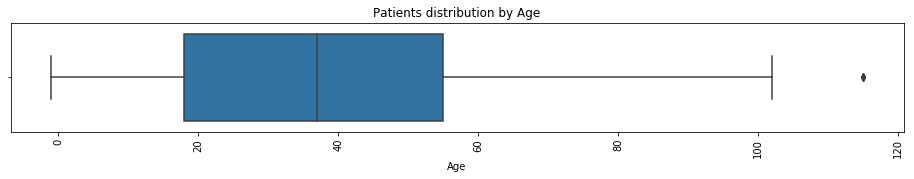

In [15]:
# Look at the distribution of the Age feature
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
dist_age = sns.boxplot(x=df.Age)
dist_age.set_title("Patients distribution by Age")
plt.show()

Most the patients are between 18 and 55 years old. The patients who are 115 years old are outliars, we will therefore drop these rows as well as the row of the patients aged -1.

In [16]:
# delete patients that are over 102
df = df.drop(df[df.Age > 102].index)
# delete the patients that are negative
df = df.drop(df[df.Age < 0].index)


In [17]:
Show = df.No_Show=='No'
No_Show = df.No_Show=='Yes'
df[Show].count(),df[No_Show].count()

(PatientId         88205
 AppointmentID     88205
 Gender            88205
 ScheduledDay      88205
 AppointmentDay    88205
 Age               88205
 Neighbourhood     88205
 Scholarship       88205
 Hypertension      88205
 Diabetes          88205
 Alcoholism        88205
 Handicap          88205
 SMS_received      88205
 No_Show           88205
 dtype: int64, PatientId         22316
 AppointmentID     22316
 Gender            22316
 ScheduledDay      22316
 AppointmentDay    22316
 Age               22316
 Neighbourhood     22316
 Scholarship       22316
 Hypertension      22316
 Diabetes          22316
 Alcoholism        22316
 Handicap          22316
 SMS_received      22316
 No_Show           22316
 dtype: int64)

numper of showed patients is (54154) 3 times greater than Non showed (17663)

In [ ]:
df[Show].mean(),df[No_Show].mean()

## lets see how many patient attend or not

In [ ]:
ax = sns.countplot(x=df.No_Show, data=df)
ax.set_title('Attend/Absent')
ax.set_xticklabels(['Attend', 'Absent'])
plt.show()

About 75% of Patient Attend and 25% Absent

## What are the most visited ages?

In [ ]:
def attendance(df,col_name,attended,absent):# setting

    plt.figure(figsize=[16,6])
    df[col_name]['Show'].hist(alpha=.5,bins=10,color='blue', label='Show')
    df[col_name]['No_Show'].hist(alpha=.5,bins=10,color='red', label='No_Show')
    plt.legend();
    # Set the title and label axes 
    plt.title('Compare Attendence Status According To Age')
    plt.xlabel('Age')
    plt.ylabel('Patients Number');
attendance(df,'Age',Show,No_Show)

**● Ages from 0 to 10 are the Most Attendance (parents take care of their kids) ● Ages above 65 are the Least Attendance**

for each age the number of attendence is bigger than the number of absence

for older than 65 y.o patients number decreased but the num of attend is still bigger than the absent

●**NO** Correlation Between **Age** and **Attendance**

## Convert Integer to Boolean
Columns Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received and No_Show should be binary data set as 0 for False and 1 for True

In [ ]:
# Scholarship
df['Scholarship'] = df['Scholarship'].apply(lambda x: True if x==1 else False)
# Hypertension
df['Hypertension'] = df['Hypertension'].apply(lambda x: True if x==1 else False)
# Diabetes
df['Diabetes'] = df['Diabetes'].apply(lambda x: True if x==1 else False)
# Handicap
df['Handicap'] = df['Handicap'].apply(lambda x: True if x==1 else False)
# Alcoholism
df['Alcoholism'] = df['Alcoholism'].apply(lambda x: True if x==1 else False)
# SMS_received
df['SMS_received'] = df['SMS_received'].apply(lambda x: True if x==1 else False)
# No_Show
df['No_Show'] = df['No_Show'].apply(lambda x: True if x=='Yes' else False)


# Additional observations

**age**: The patients are 37 years on average. 25% of patients are below 18 and most of them are below 55. There is a data range problem in the dataset. The age value cannot be below 0, and there are some very old people as well. To be investigated.

**handicap**: is represented by 4 classes as opposed to other categorical variables in this dataset. This can be a result of an error or there are 4 categories used. Both options are potentially valid and this should be confirmed by an SME.

**sms_received**: 75% of patients received sms regarding an appointment.

**awaiting_time_days**: 10 days on average patients waited for an appointment. 50% of patients waited up to 4 days and 75% up to 15 days for an appointment. The longest awaiting time was 179 days. There is at least one case where a visit happened 6 days before it was scheduled. This should not happen and will be further investigated.


In [ ]:

df.hist(figsize=(18,7));


## Let's see how many there are patients of each age


In [ ]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("No of appointments by age")
plt.show()

The above histogram shows a peak for the infants (patients of age 0). For higher age values the distribution starts to be uniform. After the age value of around 60 we see a right-skewed distribution.

## What is the gender distribution for show / no-show patients?

In [ ]:
# table with the gender and the number of patient that missed or attended their appointment
gender_tbl = pd.DataFrame(df.groupby(['Gender','No_Show'])['PatientId'].count()).reset_index()
gender_tbl




In [ ]:
# appointment attendance by gender
gender = df.groupby('Gender')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
gender.set_title("Percentage of Appointments Show/No Show by Gender")
plt.show()


From the table above, we can clearly see that 'Female' patients usually have more appointments that 'Male' patients, they also have about the double number of missed appointment. However, looking at the percentage of missed appointments by gender shows that it is almost the same rate (about 20%). Therefore, gender does not seem to be an important feature.

## Scheduled Day
Looking at the time of the booking

In [ ]:
# split ScheduledDay to get the time of the booking stored in Scheduled_Time
df['Scheduled_Time'] = pd.to_datetime(df['ScheduledDay']).dt.hour

# Look at the distribution of Scheduled_Time
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
dist_age = sns.boxplot(x=df.Scheduled_Time)
dist_age.set_title("Patients distribution by Time of the Booking")
plt.show()


The booking are made between 6am and 8pm. There are three bookings that have been taken at 9pm, although these are showed as outliars on the plot above, they will not be dropped as they could be the results of emergencies.



In [ ]:
# barchart showing percentage of show/ no-show by hours
appt_h = df.groupby('Scheduled_Time')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,5))
appt_h.set_title("Percentage of Appointment Show/No Show by Booking Hours")
plt.show()



In [ ]:
# create three groupes for morning, afternoon and evening appointments
bins= [6,11,17,22]
labels = ['Morning','Afternoon','Evening']
df['Scheduled_Period'] = pd.cut(df['Scheduled_Time'], bins=bins, labels=labels, right=False)

# barchart showing percentage of show/ no-show by time of the day
appt_tod = df.groupby('Scheduled_Period')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
appt_tod.set_title("Percentage of Appointment Show/No Show by Booking Time of the Day")
plt.show()


Morning bookings seem less likely to be missed than afternoon and evening ones.

### Looking at the day of booking

In [ ]:
# split ScheduledDay into days of the week
df['Scheduled_DayOfWeek'] = pd.to_datetime(df['ScheduledDay']).dt.day_name()

# barchart showing number of show/ no-show by day of the week
day_of_week = df.groupby('Scheduled_DayOfWeek')['No_Show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(18,5))
day_of_week.set_title("Appointment Show/No Show by Booking Day of the Week")
plt.show()


In [ ]:
# barchart showing number of show/ no-show by day of the week
day_of_week = df.groupby('Scheduled_DayOfWeek')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(18,5))
day_of_week.set_title("Percentage of Appointment Show/No Show by Booking Day of the Week")
plt.show()


Most of the bookings are at the beginning of the week, this may be explained because the medical centre seems not to be open over the weekends. Althoug Saturdays have the smallest no show rate, they also represents a too small proportion of the data to be significant. Overall, the days of the week do not seem to be an important feature.
## Appointment Date

In [ ]:
# split ScheduledDay into days of the week
df['Booking_DayOfWeek'] = pd.to_datetime(df['AppointmentDay']).dt.day_name()

# barchart showing number of show/ no-show by day of the week
day_of_week = df.groupby('Booking_DayOfWeek')['No_Show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(18,5))
day_of_week.set_title("Appointment Show/No Show by Appointment Day of the Week")
plt.show()


In [ ]:
# barchart showing number of show/ no-show by day of the week
day_of_week = df.groupby('Booking_DayOfWeek')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(18,5))
day_of_week.set_title("Percentage of Appointment Show/No Show by Appointment Day of the Week")
plt.show()



The first graph follows the same patterns as section 5.6 "Appointment Show/No Show by Booking Day of the Week" graph. This may be because patient book and have their their appointment on the same day. The percentage of show vs no show dis roughly the same accross the week.

## Waiting Time Between Booking and Medical Appointment


In [ ]:

# calculate the number of days the booking has been taken before the appointmenet
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date

df['Waiting_Days'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Look at the distribution of Waiting_Days
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
dist_age = sns.boxplot(x=df.Waiting_Days)
dist_age.set_title("Patients distribution by Waiting Time")
plt.show()


Most of the appointments are taken a month in advance. The graph above, highlights erroneous data and outliars. The negative data will be transformed into 'unknown' wating time category while the outliars will be kept as some medical appointment can take up to six months (like small surgeries).

In [ ]:
# create pre-appointment period groups using the distribution above
bins= [0,1,7,14,21,28,35,200]
labels = ['Same day','Less than a week','A week','Two weeks','Three weeks','A month','More than a month']
df['Pre_Appt_Period'] = pd.cut(df['Waiting_Days'], bins=bins, labels=labels, right=False)
# replace missing and erronous values with unknown
df['Pre_Appt_Period'] = df['Pre_Appt_Period'].cat.add_categories('unknown').fillna('unknown')

df.groupby(['Pre_Appt_Period'])['PatientId'].count()


In [ ]:
# barchart showing number of show/ no-show in percentage by the amount of time between booking and appointment
psla = df.groupby('Pre_Appt_Period')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(15,5))
psla.set_title("Percentage of Appointment Show/No Show by Time Between Booking and Appointment")
plt.show()

The graph above suggests that the longer the waiting time is between booking and the appointmnet the more likely the appointment is to be missed. This feature seems to be an important one as it shows a clear distinction for patients show/ no show depending on the number of days ahead of the appontment patients have booked.

## Does Neighbourhood Affect the Attendance?


In [ ]:
plt.figure(figsize=[18,5])
df[attend]['Neighbourhood'].value_counts().plot(kind='bar', label='Attend', color='blue')
df[absent]['Neighbourhood'].value_counts().plot(kind='bar', label='Absent', color='red')
plt.legend()
#Set the title and label axes 
plt.title('Compare Attendance Status According to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');



Most of the neighbourhouds have a no show rate of about 20%, the significant drops and peaks are because of the porr representation of a particalar neigbourhood in the dataset rather than because it is significant. Therefre, this feature does not seem to be important for the no show prediction.



## Scholarship

In [ ]:
# barchart showing number of show/ no-show by Scholarship
day_of_week = df.groupby('Scholarship')['No_Show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Appointment Show/No Show by Scholarship")
plt.show()



In [ ]:
# barchart showing the percentage of show/ no-show by Scholarship
day_of_week = df.groupby('Scholarship')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Percentage of Appointment Show/No Show by Scholarship")
plt.show()



The graphs above shows that 80% of the patients that do not have a scholarship attended their appointent while 75% of the patient with a scholarship attended. This feature could be helpful in dertermining the no show.

## Handicap

Patients suffering from a handicap represent 2% of the total appointments.

In [ ]:
# barchart showing number of show/ no-show by Hypertension
day_of_week = df.groupby('Hypertension')['No_Show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Appointment Show/No Show by Hypertension")
plt.show()

In [ ]:
# barchart showing the percentage of show/ no-show by Hypertension
day_of_week = df.groupby('Hypertension')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Percentage of Appointment Show/No Show by Hypertension")
plt.show()


● 98% of all patients are without Handcap = 70511 **: 75% Attend = 53126 , 25% Absent = 17385**

## Does Age and Chronic Deseases (Diabetes, Hypertension) Affect the Attendance?


In [ ]:
plt.figure(figsize=[16,4])
df[attend].groupby(['Diabetes', 'Hypertension']).Age.mean().plot(kind='bar', color='blue', label='attend')
df[absent].groupby(['Diabetes', 'Hypertension']).Age.mean().plot(kind='bar', color='red', label='absent')
plt.legend();
# Set the title and label axes 
plt.title('Comparison According To Age, Chronic Deseases')
plt.xlabel('Chronic Deseases')
plt.ylabel('Mean Age');


In [ ]:
# create age groups using the distribution plotted in section 4
bins= [0,10,19,26,36,46,56,66,150]
labels = ['Less than 10','10-18','19-25','26-35','36-45','46-55','56-65','More than 65']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df.groupby(['AgeGroup'])['PatientId'].count()


In [ ]:
# appointment attendance by age
age = df.groupby('AgeGroup')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,5))
age.set_title("Percentage of Appointments Show/No Show by Age")
plt.show()


The patients that seems most likely to not show-up for their appointments are between 10 and 35 years old.

## SMS Received


In [ ]:
# barchart showing number of show/ no-show by SMS Received
day_of_week = df.groupby('SMS_received')['No_Show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Appointment Show/No Show by SMS Received")
plt.show()



In [ ]:
# barchart showing the percentage of show/ no-show by SMS Received
day_of_week = df.groupby('SMS_received')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Percentage of Appointment Show/No Show by SMS Received")
plt.show()


The graphs above do not show expected results: 38% appointments for patients that received the sms were missed while 20% of the appointments for patients that did not received a sms. This feature seem to be important in dertermining appointments no show.

## Conclusions
*I have looked into the dataset and managed a few problems like unifying names, removing wrong data, adding new features based on existing data. I have also investigated most of independent variables in the dataset and made a few observations comparing them to each other as well as to the dependent one (no_show). As this was only an exploratory analysis, many potential correlations may remain uncovered. The data should be investigated further with more advanced statistical analysis to potentially reveal new insights and correlations.*

**The most important findings are:**

**Neighbourhoon* has a great effect on attendence or not. JARDIM CAMBURI has the greatest number of patients and also has the greatest showing rate

Number of showing patients from specific neighbourhood affected by receiving *SMS and Ages*

**Age* has a clear influence on the showing rate Ages from 08 are the most showing parents taking care of their kids) then from 45 55 and the least attending are whom above 65 years old

*Number of showing patients without receiving sms is greater than showing patients with receiving sms, which means that we need to revisit our sms compaghin

Limitations

**No clear correlation between showing and gender, chronic diseases, enrollement in the welfare program**

